# Манипулирование данными в базе данных

План:

* Операторы определения данных
* Операторы манипулирования данными
* Самостоятельная работа

Кто хорошо работает с [SQL](https://www.codewars.com).


## Обновление текущего SQLite 

In [ ]:
 import sqlite3
 sqlite3.sqlite_version

In [ ]:
!curl https://www.sqlite.org/src/tarball/sqlite.tar.gz?r=release | tar xz
%cd sqlite/
!./configure
!make sqlite3.c
%cd /content
!npx degit coleifer/pysqlite3 -f
!cp sqlite/sqlite3.[ch] .
!python setup.py build_static build
!cp build/lib.linux-x86_64-3.7/pysqlite3/_sqlite3.cpython-37m-x86_64-linux-gnu.so \
     /usr/lib/python3.7/lib-dynload/

Затем в меню `Runtime > Restart runtime`. Проверяем:

In [ ]:
import sqlite3
sqlite3.sqlite_version

## Описание тестовой базы

Обучающий материал и описание взят с [sqlitetutorial.net](https://www.sqlitetutorial.net/sqlite-sample-database/). Все права сохранены за ресурсом.

Таблицы базы данных образцов Chinook

В базе данных образцов Chinook 11 таблиц:

* `Employee` - хранятся данные о сотрудниках, такие как идентификатор сотрудника, фамилия, имя и т. д. Он также имеет поле с именем `ReportsTo`, чтобы указать, кто кому отчитывается.
* `Customer` - хранит данные клиентов.
* `Invoice` и `InvoiceLine` в этих двух таблицах хранятся данные счета-фактуры. В таблице `Invoice` хранятся данные заголовка счета-фактуры, а в таблице `InvoiceLine` - хранятся данные позиций счета-фактуры.
* `Artist` - хранятся данные исполнителей. Это простая таблица, которая содержит только идентификатор и имя исполнителя.
* `Album` - хранятся данные о списке дорожек. Каждый альбом принадлежит одному исполнителю. Тем не менее, у одного исполнителя может быть несколько альбомов.
* `MediaType` - хранятся типы носителей, такие как аудиофайлы `MPEG` и аудиофайлы `AAC`.
* `Genre` - жанры музыки такие как рок, джаз, метал и т. д.
* `Track` - данные песен. Каждый трек принадлежит одному альбому.
* `Playlist` и `PlaylistTrack` в таблице списков воспроизведения хранятся данные о списках воспроизведения. Каждый список воспроизведения содержит список треков. Каждый трек может принадлежать нескольким спискам воспроизведения. Связь между таблицей списков воспроизведения и таблицей дорожек - "многие ко многим". Таблица `PlaylistTrack` используется для отражения этой взаимосвязи.

## Загрузка базы данных в виртуальную машину

Загрузка git-репозитория в текущее окружение:

In [ ]:
%cd /content/
!mkdir gitrepos
%cd /content/gitrepos/
!git clone https://github.com/lerocha/chinook-database

Копирование базы данных в папку, в которой будем работать:

In [ ]:
%cd /content/
!mkdir testdata
%cd /content/testdata

In [ ]:
!cp /content/gitrepos/chinook-database/ChinookDatabase/DataSources/Chinook_Sqlite.sqlite  Chinook_Sqlite.sqlite 

## Подключение базы в текущую среду исполнения

In [ ]:
%load_ext sql

%sql sqlite:////content/testdata/Chinook_Sqlite.sqlite

Проверка:

In [ ]:
%%sql 
SELECT * FROM GENRE  LIMIT(10);

## Команда [`INSERT`](https://www.sqlitetutorial.net/sqlite-insert/)

Чтобы вставить одну строку в таблицу, вы используете следующую форму инструкции `INSERT`:


```sql
INSERT INTO table (column1, column2, ..)
VALUES (value1, value2, ...);
```

Чтобы вставить несколько строк в таблицу, вы используете следующую форму инструкции `INSERT`:

```sql
INSERT INTO table1 (column1,column2 ,..)
VALUES 
   (value1,value2 ,...),
   (value1,value2 ,...),
    ...
   (value1,value2 ,...);
```

Следующий оператор вставляет новую строку в таблицу артистов:

In [ ]:
%%sql
INSERT INTO artist (name)
VALUES('Bud Powell');

В следующем примере в таблицу художников вставляются три строки:

In [ ]:
%%sql
INSERT INTO artist (name)
VALUES
	("Buddy Rich"),
	("Candido"),
	("Charlie Byrd");

## Команда [`UPDATE`](https://www.sqlitetutorial.net/sqlite-insert/)

Чтобы обновить существующие данные в таблице, вы используете инструкцию SQLite `UPDATE`. Ниже показан синтаксис инструкции `UPDATE`:



```sql
UPDATE table
SET column_1 = new_value_1,
    column_2 = new_value_2
WHERE
    search_condition 
ORDER column_or_expression
LIMIT row_count OFFSET offset;
```

* Сначала укажите таблицу, которую вы хотите обновить после предложения `UPDATE`.
* Во-вторых, установите новое значение для каждого столбца таблицы в предложении `SET`.
* В-третьих, укажите строки для обновления, используя условие в предложении `WHERE`. Предложение `WHERE` является необязательным. Если вы пропустите его, инструкция `UPDATE` обновит данные во всех строках таблицы.
* Наконец, используйте предложения `ORDER BY` и `LIMIT` в инструкции `UPDATE`, чтобы указать количество строк для обновления.



Предположим, Джейн вышла замуж и захотела сменить свою фамилию на фамилию мужа, то есть Смит. В этом случае вы можете обновить фамилию Джейн, используя следующую инструкцию:

In [ ]:
%%sql
UPDATE employee
SET lastname = 'Smith'
WHERE employeeid = 3;

Предположим, Парк Маргарет находится в Торонто, и вы хотите изменить его адрес, город и информацию о штате. Вы можете использовать инструкцию `UPDATE` для обновления нескольких столбцов следующим образом:

In [ ]:
%%sql
UPDATE employee
SET city = 'Toronto',
    state = 'ON',
    postalcode = 'M5P 2N7'
WHERE
    employeeid = 4;

## Команда [`DELETE`](https://www.sqlitetutorial.net/sqlite-delete/)

Инструкция SQLite `DELETE` позволяет удалить одну строку, несколько строк и все строки в таблице. Синтаксис инструкции SQLite `DELETE` выглядит следующим образом:

```sql
DELETE FROM table
WHERE search_condition;
```

* Сначала укажите имя таблицы, строки которой вы хотите удалить после `DELETE FROM` ключевых слов.
* Во-вторых, добавьте условие поиска в предложение `WHERE`, чтобы определить строки для удаления. Предложение `WHERE` является необязательной частью инструкции `DELETE`. Если вы опустите предложение `WHERE`, оператор `DELETE` удалит все строки в таблице.
* SQLite также предоставляет расширение инструкции `DELETE`, добавляя предложения `ORDER BY` и `LIMIT`. Если вы компилируете SQLite с параметром времени компиляции `SQLITE_ENABLE_UPDATE_DELETE_LIMIT`, вы можете использовать предложение `ORDER BY` и `LIMIT` в инструкции `DELETE`, например, в следующей форме:

```sql
DELETE FROM table
WHERE search_condition
ORDER BY criteria
LIMIT row_count OFFSET offset;
```

Можете создать `artists_backup` таблицу и вставить в нее данные, используя следующий скрипт:

In [ ]:
%%sql

-- create artists backup table
CREATE TABLE artists_backup(
   artistid INTEGER PRIMARY KEY AUTOINCREMENT,
   name NVARCHAR
);

In [ ]:
%%sql

-- populate data from the artists table
INSERT INTO artists_backup
SELECT artistid,name
FROM artist

Следующий оператор возвращает строки из `artists_backup` таблицы:

In [ ]:
%%sql

SELECT
	artistid,
	name
FROM
	artists_backup
LIMIT 10;

Чтобы удалить исполнителя с идентификатором 1, вы используете следующую инструкцию:

In [ ]:
%%sql

DELETE FROM artists_backup
WHERE artistid = 1;

## Команда [`REPLACE`](https://www.sqlitetutorial.net/sqlite-replace-statement/)

Для самостоятельного изучения.

## Команда (оператор) [`SELECT`](https://www.sqlitetutorial.net/sqlite-select/)

In [ ]:
%%sql 
SELECT	1 + 1;

In [ ]:
%%sql 
SELECT 
   10 / 5 AS A, 
   2 * 4 AS B;

Описание оператора `SELECT` представлено в [документации](https://www.sqlite.org/lang_select.html). Синтаксис оператора `SELECT` выглядит следующим образом:


```sql
SELECT DISTINCT column_list
FROM table_list
  JOIN table ON join_condition
WHERE row_filter
ORDER BY column
LIMIT count OFFSET offset
GROUP BY column
HAVING group_filter;
```

Приведенные выше комманды означают:

* `ORDER BY` - порядок для сортировки результирующего набора
* `DISTINCT` - для запроса уникальных строк в таблице
* `WHERE` - для фильтрации строк в результирующем наборе
* `LIMIT OFFSET` - для ограничения количества возвращаемых строк
* `INNER JOIN` и `LEFT JOIN` - для запроса данных из нескольких таблиц с помощью соединения
* `GROUP BY` - разделить строки группы на группы и применить функцию агрегирования для каждой группы
* `HAVING` - для фильтрации групп


Получить данные из каталога треков, такие как идентификатор трека, название трека, композитор и цена за единицу:

In [ ]:
%%sql 
SELECT
  trackid,
	name,
	composer,
	unitprice
FROM
	TRACK
/* LIMIT 10 */

Получить данные из всех столбцов, указываете столбцы таблицы дорожек в предложении SELECT следующим образом:

In [ ]:
%%sql
SELECT
	trackid,
	name,
	albumid,
	mediatypeid,
	genreid,
	composer,
	milliseconds,
	bytes,
	unitprice
FROM
	track 
LIMIT 10

Аналогичный результат будет получен таким образом:

In [ ]:
%%sql
SELECT * FROM track LIMIT 10;

## Команда [`LIMIT`](https://www.sqlitetutorial.net/sqlite-limit/)

Следующее иллюстрирует синтаксис предложения LIMIT.

```sql
SELECT
	column_list
FROM
	table
LIMIT row_count;
```

`row_count` - это положительное целое число, которое определяет количество возвращаемых строк.

In [ ]:
%%sql
SELECT
	trackId,
	name
FROM
	track
LIMIT 10;

Если вы хотите получить первые 10 строк, начиная с 10-й строки результирующего набора, вы используете ключевое слово `OFFSET` следующим образом:

In [ ]:
%%sql
SELECT
	trackId,
	name
FROM
	track
LIMIT 10 OFFSET 10;

## Команда [`ORDER BY`](https://www.sqlitetutorial.net/sqlite-order-by/)

Чтобы отсортировать результирующий набор, добавляете предложение `ORDER BY` в оператор `SELECT` следующим образом:

```sql
SELECT
   select_list
FROM
   table
ORDER BY
    column_1 ASC,
    column_2 DESC;
```

В этом синтаксисе вы помещаете имя столбца, по которому вы хотите выполнить сортировку, после предложения ORDER BY, за которым следует ключевое слово `ASC` или `DESC`:

* Ключевое слово `ASC` означает восходящий.
* Ключевое слово `DESC` означает "нисходящий".

Предположим, вы хотите получить данные из столбцов имя, миллисекунды и идентификатор альбома, вы используете следующий оператор:

In [ ]:
%%sql
SELECT name, milliseconds, albumid FROM track LIMIT 10;

Предположим, вы хотите отсортировать результирующий набор на основе столбца `AlbumId` в порядке возрастания:

In [ ]:
%%sql
SELECT
	name,
	milliseconds, 
	albumid
FROM
	track
ORDER BY
	albumid ASC LIMIT 10;

Аналогичный результат:

In [ ]:
%%sql
SELECT
	name,
	milliseconds, 
	albumid
FROM
	track
ORDER BY
	albumid LIMIT 10;

В порядке убывания:

In [ ]:
%%sql
SELECT
	name,
	milliseconds, 
	albumid
FROM
	track
ORDER BY
	albumid DESC LIMIT 10;

Следующее выражение сортирует дорожки как по альбому (3-й столбец), так и по миллисекундам (2-й столбец) в порядке возрастания:

In [ ]:
%%sql
SELECT
	name,
	milliseconds, 
	albumid
FROM
	track
ORDER BY
	 3,2 LIMIT 10;

### Сортировка `NULL`-ов


Предположим, вы хотите сохранить день рождения артиста в таблице. На момент сохранения записи исполнителя у вас нет информации о дне рождения. Или хранить информацию о покупапателе, о котором нет иформации о его работе в компании:

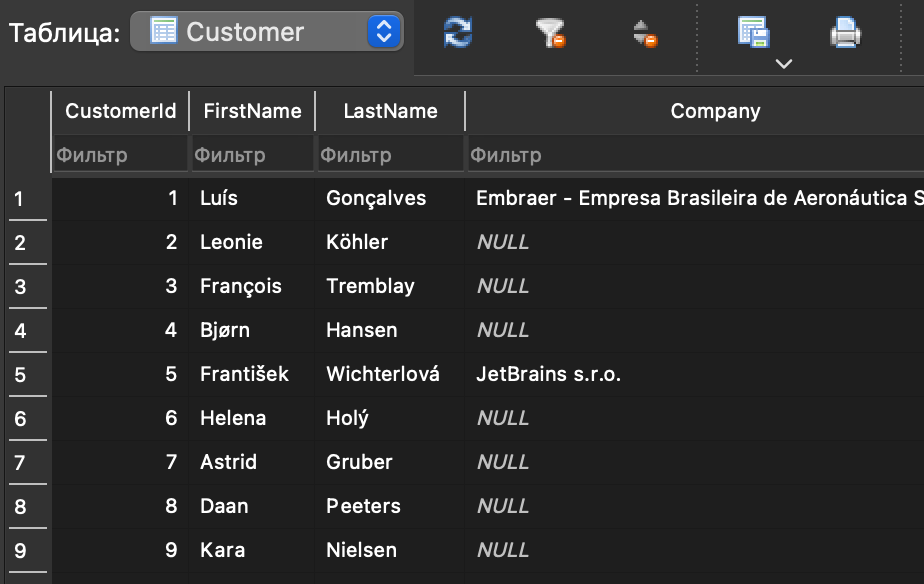


Для представления неизвестной информации о дне рождения в базе данных вы можете использовать специальную дату, например `01.01.1900` или `''` пустую строку. Однако оба эти значения не ясно показывают, что день рождения неизвестен.

`NULL` (в блокноте  отбражается питоновский аналог `None`) был изобретен для решения этой проблемы. Вместо использования специального значения для указания на отсутствие информации используется значение `NULL`.

Значение `NULL` является особенным, потому что вы не можете сравнить его с другим значением. Проще говоря, если две части информации неизвестны, вы не можете их сравнивать.

Когда дело доходит до сортировки, SQLite считает, что значение `NULL` меньше любого другого значения.

Это означает, что нули будут отображаться в начале набора результатов, если вы используете `ASC`, или в конце набора результатов, если вы используете `DESC`.

SQLite 3.30.0 добавил параметры `NULLS FIRST` и `NULLS LAST` в предложение `ORDER BY`. Опция `NULLS FIRST` указывает, что нули будут отображаться в начале набора результатов, в то время как опция `NULLS LAST` помещает нули в конец набора результатов.

В следующем примере используется предложение `ORDER BY` для сортировки треков по композиторам:

In [ ]:
%%sql
SELECT 
    TrackId, 
    Name, 
    Composer 
FROM 
   track
ORDER BY 
   Composer
LIMIT 10;

Пример использования `NULLS LAST`:

In [ ]:
%%sql
SELECT 
    TrackId, 
    Name, 
    Composer 
FROM 
   track
ORDER BY 
   Composer
NULLS LAST
LIMIT 10;

## Команда [`SELECT DISTINCT`](https://www.sqlitetutorial.net/sqlite-select-distinct)

Предложение `DISTINCT` является необязательным предложением оператора `SELECT`. Предложение `DISTINCT` позволяет удалять повторяющиеся строки в результирующем наборе.

Следующее утверждение иллюстрирует синтаксис предложения `DISTINCT`:

```sql
SELECT DISTINCT select_list
FROM table;
```

* Во-первых, предложение `DISTINCT` должно появиться сразу после ключевого слова `SELECT`.
* Во-вторых, вы размещаете столбец или список столбцов после ключевого слова `DISTINCT`. Если вы используете один столбец, SQLite использует значения в этом столбце для оценки дубликата. В случае, если вы используете несколько столбцов, SQLite использует комбинацию значений в этих столбцах для оценки дубликата.

Предположим, вы хотите узнать города, в которых находятся клиенты, вы можете использовать инструкцию `SELECT` для получения данных из столбца город таблицы клиенты следующим образом:

In [ ]:
%%sql
SELECT city
FROM customer
ORDER BY city LIMIT 10;

In [ ]:
%%sql
SELECT DISTINCT city
FROM customer
ORDER BY city LIMIT 10;

`DISTINCT` работает для значений в нескольких столбцах:

In [ ]:
%%sql
SELECT
	city,
	country
FROM
	customer
ORDER BY
	country LIMIT 10

In [ ]:
%%sql
SELECT DISTINCT
	city,
	country
FROM
	customer
ORDER BY
	country LIMIT 10

Пример  с NULL значениями:

In [ ]:
%%sql
SELECT company
FROM customer LIMIT 10;

In [ ]:
%%sql
SELECT DISTINCT company
FROM customer LIMIT 10;

## Команда [`WHERE`](https://www.sqlitetutorial.net/sqlite-where/)

Предложение `WHERE` является необязательным предложением оператора `SELECT`. Он появляется после предложения `FROM` в виде следующего утверждения:

```sql
SELECT
	column_list
FROM
	table
WHERE
	search_condition;
```

* Во-первых, проверяем таблицу в предложении `FROM`.
* Во-вторых, оцениваем условия в предложении `WHERE`, чтобы получить строки, соответствующие этим условиям.
* В-третьих, создаем окончательный набор результатов на основе строк на предыдущем шаге со столбцами в предложении `SELECT`.

Условие поиска в поле `WHERE` имеет следующую форму:

```sql
left_expression COMPARISON_OPERATOR right_expression
```

Например, вы можете сформировать условие поиска следующим образом:


```sql
WHERE column_1 = 100;

WHERE column_2 IN (1,2,3);

WHERE column_3 LIKE 'An%';

WHERE column_4 BETWEEN 10 AND 20;
```

Операторы сравнения:

| Оператор | Описание |
| --- | --- |
| = | Равно |
| <> or != | Не равно |
| <	| Меньше, чем | 
| > | Больше, чем |
| <= | меньше, чем или ровно |
| >= | больше, чем или ровно |

Логические операторы:

| Оператор | Описание |
| --- | --- |
| `ALL` | возвращает `1`, если все выражения равны `1` |
| `AND` | возвращает `1`, если оба выражения равны `1`, и `0`, если одно из выражений равно `0` |
| `ANY` | возвращает `1`, если любое из множества сравнений равно `1` |
| `BETWEEN` | возвращает `1`, если значение находится в пределах диапазона |
| `EXISTS` | возвращает `1`, если подзапрос содержит какие-либо строки |
| `IN` | возвращает `1`, если значение находится в списке значений |
| `LIKE` | возвращает `1`, если значение соответствует шаблону |
| `NOT` | инверсирует значение других операторов, таких как `NOT EXISTS`, `NOT IN`, `NOT BETWEEN` |
| `OR` | возвращает `true`, если любое из выражений равно `1` |


В следующем запросе используется предложение `WHERE` оператор равенства для поиска всех треков в идентификаторе альбома `1`:

In [ ]:
%%sql
SELECT
   name,
   milliseconds,
   bytes,
   albumid
FROM
   track
WHERE
   albumid = 1

Для получения треков альбома `1`, длина которых превышает `250 000` миллисекунд, вы используете следующее утверждение:

In [ ]:
%%sql
SELECT
	name,
	milliseconds,
	bytes,
	albumid
FROM
	track
WHERE
	albumid = 1
AND milliseconds > 250000

Команда `WHERE` с примером конструкцией `LIKE`:

In [ ]:
%%sql
SELECT
	name,
	albumid,
	composer
FROM
	track
WHERE
	composer LIKE '%Smith%'
ORDER BY
	albumid
LIMIT 10

Команда `WHERE` с примером конструкцией `IN`:

In [ ]:
%%sql
SELECT
	name,
	albumid,
	mediatypeid
FROM
	track
WHERE
	mediatypeid IN (2, 3) LIMIT 10;

В следующем заявлении указаны счета-фактуры, общая сумма которых составляет от `14,96` до `18,86`:

In [ ]:
%%sql
SELECT
    InvoiceId,
    BillingAddress,
    Total
FROM
    invoice
WHERE
    Total BETWEEN 14.91 and 18.86    
ORDER BY
    Total
LIMIT 10; 

Чтобы найти счета, общая сумма которых не находится в диапазоне от 1 до 20, вы используете оператор `NOT BETWEEN`, как показано в следующем запросе:


In [ ]:
%%sql

SELECT
    InvoiceId,
    BillingAddress,
    Total
FROM
    invoice
WHERE
    Total NOT BETWEEN 1 and 20
ORDER BY
    Total
LIMIT 10;   

## Утверждение [`IS NULL`](https://www.sqlitetutorial.net/sqlite-is-null/)

Следующее утверждение пытается найти треки, композиторы которых являются `NULL`:

In [ ]:
%%sql 
SELECT
    Name, 
    Composer
FROM
    track
WHERE
    Composer is NULL
LIMIT 10;

## Команда [`GLOB`](https://www.sqlitetutorial.net/sqlite-glob/)


Оператор `GLOB` аналогичен оператору `LIKE`. Оператор GLOB определяет, соответствует ли строка определенному шаблону.

В отличие от оператора `LIKE`, оператор `GLOB` чувствителен к регистру и использует подстановочные знаки `UNIX`. Кроме того, шаблоны глобусов не содержат экранирующих символов.

В следующем заявлении указаны треки, названия которых начинаются с букв `Man`.

In [ ]:
%%sql
SELECT
	trackid,
	name
FROM
	track
WHERE
	name GLOB 'Man*'
LIMIT 10;

В следующем заявлении указаны треки, названия которых заканчиваются на `Man`.

In [ ]:
%%sql
SELECT
	trackid,
	name
FROM
	track
WHERE
	name GLOB '*Man'
LIMIT 10;

Чтобы найти треки, названия которых содержат цифры, вы можете использовать подстановочный знак списка `[0-9]` следующим образом:

In [ ]:
%%sql
SELECT
	trackid,
	name
FROM
	track
WHERE
	name GLOB '*[1-9]*'
LIMIT 10;

## Команда [`Join`](https://www.sqlitetutorial.net/sqlite-join/)

Для демонстрации мы будем использовать таблицы исполнителей и альбомов из базы данных образцов.

In [ ]:
%%sql 
SELECT
	*
FROM
	album
LIMIT 10

In [ ]:
%%sql 
SELECT
	*
FROM
	artist
LIMIT 10

У исполнителя может быть ноль или несколько альбомов, в то время как альбом принадлежит одному исполнителю:

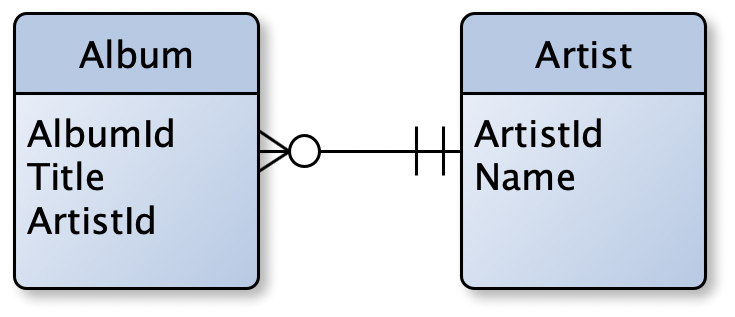

Для запроса данных из таблиц "Исполнители" и "Альбомы" вы можете использовать выражения `INNER JOIN`, `LEFT JOIN`, or `CROSS JOIN`. Каждое предложение `JOIN` определяет, как SQLite использует данные из одной таблицы для сопоставления со строками в другой таблице.

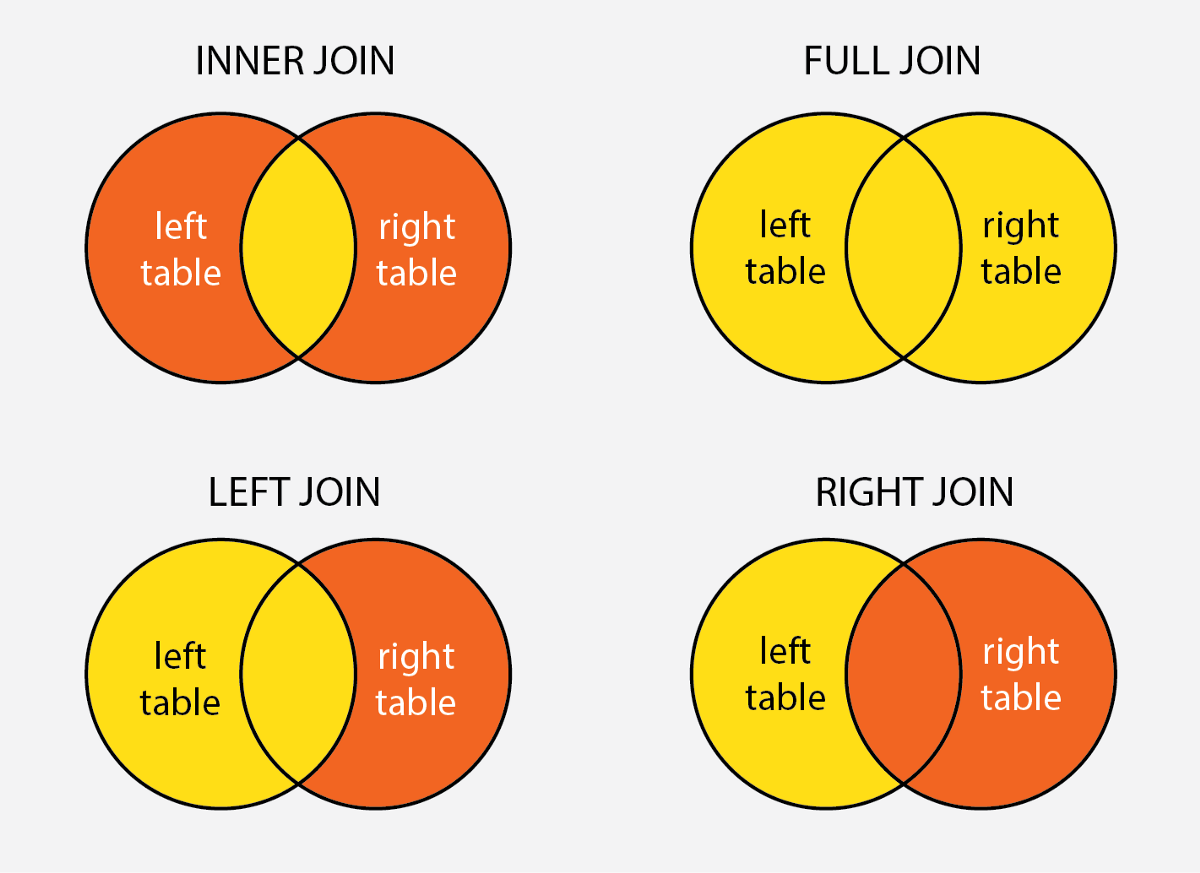

### `INNER JOIN`



Следующее утверждение возвращает названия альбомов и имена их исполнителей:

In [ ]:
%%sql
SELECT 
    Title,
    Name
FROM 
    album
INNER JOIN artist
    ON artist.ArtistId = album.ArtistId
LIMIT 10;

В этом примере предложение `INNER JOIN` сопоставляет каждую строку из таблицы альбомов с каждой строкой из таблицы исполнителей на основе условия соединения (`artist.ArtistId = album.ArtistId`), указанный после ключевого слова `ON`.

Если условие соединения равно `true` (или `1`), столбцы строк из таблиц "Альбомы" и "Исполнители" включаются в результирующий набор.

В этом запросе используются псевдонимы таблиц (`l` для таблицы альбомов и `r` для таблицы исполнителей), чтобы сократить запрос:

In [ ]:
%%sql
SELECT
    l.Title, 
    r.Name
FROM
    album l
INNER JOIN artist r ON
    r.ArtistId = l.ArtistId
LIMIT 10;

В случае, если имена столбцов объединенных таблиц совпадают, вы можете использовать синтаксис USING следующим образом:

In [ ]:
%%sql
SELECT
   Title, 
   Name
FROM
   album
INNER JOIN artist USING(ArtistId)
LIMIT 10

### `LEFT JOIN`


Оператор выбирает имена исполнителей и названия альбомов из таблиц `Исполнители` и `Альбомы`, используя предложение `LEFT JOIN`:

In [ ]:
%%sql
SELECT
    Name, 
    Title
FROM
    artist
LEFT JOIN album ON
    artist.ArtistId = album.ArtistId
ORDER BY Name
LIMIT 10;

Предложение `LEFT JOIN` выбирает данные, начиная с левой таблицы (Исполнители), и соответствующие строки в правой таблице (Альбомы) на основе условия соединения (`artist.ArtistId = album.ArtistId`) .

Левое соединение возвращает все строки из таблицы исполнителей (или левой таблицы) и соответствующие строки из таблицы альбомов (или правой таблицы).

Если строка из левой таблицы не имеет соответствующей строки в правой таблице, SQLite включает столбцы строк в левой таблице и NULL для столбцов правой таблицы.

Если вы хотите найти исполнителей, у которых нет альбомов, вы можете добавить предложение `WHERE`, как показано в следующем запросе:

In [ ]:
%%sql
SELECT
    Name,
    Title
FROM
    artist
LEFT JOIN album ON
    artist.ArtistId = album.ArtistId
WHERE Title IS NULL   
ORDER BY Name
LIMIT 10;

Обратите внимание, что `LEFT JOIN` и `LEFT OUTER JOIN`  являются синонимами.

### `CROSS JOIN`

Предложение `CROSS JOIN` создает декартово произведение строк из соединенных таблиц.

В отличие от предложений `INNER JOIN` и `LEFT JOIN`, `CROSS JOIN` не имеет условия соединения. Вот основной синтаксис предложения `CROSS JOIN`:


```sql
SELECT
    select_list
FROM table1
CROSS JOIN table2;
```

Следующий сценарий создает таблицы продуктов и календарей:

In [ ]:
%%sql

CREATE TABLE products(
    product text NOT null
);


CREATE TABLE calendars(
    y int NOT NULL,
    m int NOT NULL
);

In [ ]:
%%sql

INSERT INTO products(product)
VALUES('P1'),('P2'),('P3');


INSERT INTO calendars(y,m)
VALUES 
    (2019,1),
    (2019,2),
    (2019,3),
    (2019,4),
    (2019,5),
    (2019,6),
    (2019,7),
    (2019,8),
    (2019,9),
    (2019,10),
    (2019,11),
    (2019,12);

В этом запросе используется предложение `CROSS JOIN` для объединения продуктов с месяцами:

In [ ]:
%%sql

SELECT * 
FROM products
CROSS JOIN calendars;

### Разница между WHERE и ON в SQL

[Difference between WHERE and ON in SQL](https://dataschool.com/how-to-teach-people-sql/difference-between-where-and-on-in-sql/)

In [ ]:
%%sql
SELECT
    Name, 
    Title
FROM
    artist, album
WHERE artist.ArtistId = album.ArtistId
ORDER BY Name
LIMIT 10;

## Команда [`GROUP BY`](https://www.sqlitetutorial.net/sqlite-group-by/)

Выражение `GROUP BY` является необязательным выражением оператора `SELECT`. Выражение `GROUP BY` выделенной группе строк в сводные строки по значениям одного или нескольких столбцов.

Выражение `GROUP BY` возвращает одну строку для каждой группы. Для каждой группы вы можете применить агрегированную функцию, такую как `MIN`, `MAX`, `SUM`, `COUNT` или `AVG`, чтобы предоставить дополнительную информацию о каждой группе.

Следующий оператор иллюстрирует синтаксис предложения SQLite `GROUP BY`.



```sql
SELECT 
    column_1,
    aggregate_function(column_2) 
FROM 
    table
GROUP BY 
    column_1,
    column_2;
```



Предложение `GROUP BY` следует за предложением `FROM` оператора `SELECT`. В случае, если оператор содержит предложение `WHERE`, предложение `GROUP BY` должно следовать за предложением `WHERE`.

За предложением `GROUP BY` следует столбец или список столбцов, разделенных запятыми, используемых для указания группы

Следующий скрипт возвращает идентификатор альбома и количество треков в альбоме. Он использует предложение `GROUP BY` для группировки треков по альбомам и применяет функцию `COUNT()` к каждой группе.

In [ ]:
%%sql
SELECT
	albumid,
	COUNT(trackid) AS COUNT_OF_TRACKS
FROM
	track
GROUP BY
	albumid
LIMIT 10;

Вы можете использовать предложение `ORDER BY` для сортировки групп следующим образом:

In [ ]:
%%sql
SELECT
	albumid,
	COUNT(trackid)
FROM
	track
GROUP BY
	albumid
ORDER BY COUNT(trackid) DESC LIMIT 10;

In [ ]:
%%sql
SELECT
	albumid,
	COUNT(trackid) AS COUNT_OF_TRACKS
FROM
	track
GROUP BY
	albumid
ORDER BY COUNT_OF_TRACKS DESC LIMIT 10;

### `GROUP BY` и `INNER JOIN` выражение

Следующий оператор объединяет таблицу треков с таблицей альбомов, чтобы получить названия альбомов, и использует предложение `GROUP BY` с функцией `COUNT` для получения количества треков на альбом.

In [ ]:
%%sql

SELECT
	track.albumid,
	title,
	COUNT(trackid)
FROM
	track
INNER JOIN album ON album.albumid = track.albumid
GROUP BY
	track.albumid LIMIT 10;

### `GROUP BY` с `HAVING` выражением

Для фильтрации групп вы используете предложение `GROUP BY` with `HAVING`. Например, чтобы получить альбомы, содержащие более 15 треков, вы используете следующую инструкцию:

In [ ]:
%%sql

SELECT
	track.albumid,
	title,
	COUNT(trackid)
FROM
	track
INNER JOIN album ON album.albumid = track.albumid
GROUP BY
	track.albumid
HAVING COUNT(trackid) > 15
LIMIT 10;

### `GROUP BY` с `SUM`




Вы можете использовать функцию `SUM` для расчета общей суммы по группе. Например, чтобы получить общую длину и байты для каждого альбома, вы используете функцию `SUM` для вычисления общего количества миллисекунд и байтов.

In [ ]:
%%sql
SELECT
	albumid,
	SUM(milliseconds) length,
	SUM(bytes) size
FROM
	track
GROUP BY
	albumid
  LIMIT 10;

### `GROUP BY` с `MAX`, `MIN` и `AVG` выражениями

Следующий скрипт возвращает идентификатор альбома, название альбома, максимальную длину, минимальную длину и среднюю длину дорожек в таблице дорожек.

In [ ]:
%%sql
SELECT
	track.albumid,
	title,
	min(milliseconds),
	max(milliseconds),
	round(avg(milliseconds),2)
FROM
	track
INNER JOIN album ON album.albumid = track.albumid
GROUP BY
	track.albumid
  LIMIT 10;

### `GROUP BY` по нескольким столбцам


В предыдущем примере мы использовали один столбец в предложении `GROUP BY`. SQLite позволяет группировать строки по нескольким столбцам.

Например, чтобы сгруппировать треки по типу носителя и жанру, вы используете следующую инструкцию:

In [ ]:
%%sql

SELECT
   MediaTypeId, 
   GenreId, 
   COUNT(TrackId)
FROM
   track
GROUP BY
   MediaTypeId, 
   GenreId
LIMIT 10;

### `GROUP BY` с датами



В следующем заявлении возвращается номер счета-фактуры по годам.


In [ ]:
%%sql

SELECT
   STRFTIME('%Y', InvoiceDate) InvoiceYear, 
   COUNT(InvoiceId) InvoiceCount
FROM
   invoice
GROUP BY
   STRFTIME('%Y', InvoiceDate)
ORDER BY
   InvoiceYear;

### Команда [UNION](https://www.sqlitetutorial.net/sqlite-union/)

Иногда вам необходимо объединить данные из нескольких таблиц в полный набор результатов. Это может быть для таблиц с аналогичными данными в одной базе данных или, возможно, вам нужно объединить аналогичные данные из нескольких баз данных.

Чтобы объединить строки из двух или более запросов в один результирующий набор, вы используете оператор `UNION` SQLite. Следующее иллюстрирует основной синтаксис оператора `UNION`:

```sql
query_1
UNION [ALL]
query_2
UNION [ALL]
query_3
...;
```

Операторы `UNION` и `UNION ALL` объединяют строки из результирующих наборов в единый результирующий набор. Оператор `UNION` удаляет повторяющиеся строки, в то время как оператор `UNION ALL` этого не делает.

Предположим, у нас есть две таблицы t1 и t2 со следующими структурами:

In [ ]:
%%sql
CREATE TABLE t1(
    v1 INT
);
 
INSERT INTO t1(v1)
VALUES(1),(2),(3);
 
CREATE TABLE t2(
    v2 INT
);
INSERT INTO t2(v2)
VALUES(2),(3),(4);

Следующий оператор объединяет результирующие наборы таблиц t1 и t2 с использованием оператора `UNION`:

In [ ]:
%%sql

SELECT v1
  FROM t1
UNION
SELECT v2
  FROM t2;

Следующий оператор объединяет результирующие наборы таблиц t1 и t2 с использованием оператора `UNION ALL`:

In [ ]:
%%sql
SELECT v1
  FROM t1
UNION ALL
SELECT v2
  FROM t2;

В этом заявлении используется оператор `UNION` для объединения имен сотрудников и клиентов в единый список:

In [ ]:
%%sql
SELECT FirstName, LastName, 'Employee' AS Type
FROM employee
UNION
SELECT FirstName, LastName, 'Customer'
FROM customer ORDER BY FirstName, LastName
LIMIT 10;

## Подзапросы SQL



Подзапрос - это оператор `SELECT`, вложенный в другой оператор:

```sql
SELECT column_1
FROM table_1
WHERE column_1 = (
   SELECT column_1 
   FROM table_2
);
```

Следующий запрос является внешним запросом:

```
SELECT column_1
  FROM table_1
 WHERE colum_1 =
```

И следующий запрос является подзапросом:

```sql
(SELECT column_1
  FROM table_2)
```

Вы должны использовать пару круглых скобок, чтобы заключить подзапрос. Обратите внимание, что вы можете вложить подзапрос в другой подзапрос с определенной глубиной.

Как правило, подзапрос возвращает одну строку в качестве атомарного значения, хотя он может возвращать несколько строк для сравнения значений с оператором `IN`.

Вы можете использовать подзапрос в предложениях `SELECT`, `FROM`, `WHERE` и `JOIN`.



Вы можете использовать простой подзапрос в качестве условия поиска. Например, следующее утверждение возвращает все треки в альбоме с названием "Пусть будет рок".

In [ ]:
%%sql
SELECT trackid,
       name,
       albumid
FROM track
WHERE albumid = (
   SELECT albumid
   FROM album
   WHERE title = 'Let There Be Rock'
);

Например, следующий запрос возвращает клиентов, торговые представители которых находятся в Канаде:

In [ ]:
%%sql
SELECT customerid,
       firstname,
       lastname
  FROM customer
 WHERE supportrepid IN (
           SELECT employeeid
             FROM employee
            WHERE country = 'Canada'
       )
LIMIT 10;

### Коррелированный подзапрос

В следующем запросе используется соответствующий подзапрос для возврата альбомов размером не менее 10 МБ:

In [ ]:
%%sql
SELECT albumid,
       title
  FROM album
 WHERE 10000000 > (
                      SELECT sum(bytes) 
                        FROM track
                       WHERE track.AlbumId = album.AlbumId
                  )
 ORDER BY title
 LIMIT 10;

### Подзапрос, связанный с SQLite, в примере предложения SELECT

В следующем запросе используется соответствующий подзапрос в предложении `SELECT` для возврата количества треков в альбоме.

In [ ]:
%%sql
SELECT albumid,
       title,
       (
           SELECT count(trackid) 
             FROM track
            WHERE track.AlbumId = album.AlbumId
       )
       tracks_count
  FROM album
 ORDER BY tracks_count DESC
 LIMIT 10;

 ## Самостоятельная работа

Задание для тех, кто не работает с SQLite на своем компьютере:

1. Создать новый блокнот и подгрузить базу данных, которая рассматривалась в блокноте
1. Создать свои запросы по каждой рассматриваемой команде

Задание для тех, кто работает с SQLite на своем компьютере:

1. Придумать свою базу данных (3-4 таблицы). Примеры своих баз данных:
   * База данных своих тиммейтов
   * База данных персонажей в Dota 2 (или что там у зумеров популярно? Геншин?)
   * База данных одноклассников
1. Подготовить запросы с использованием команд, которые рассматривались в блокноте
